<a href="https://colab.research.google.com/github/siveshb1/Machine-Learning-Projects/blob/main/Machine%20Learning%20Basics/Introduction_to_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
heart_disease = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = heart_disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
car_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
X = car_sales.drop('Price',axis = 1)
y = car_sales['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model.predict(X_test)

ValueError: could not convert string to float: 'Nissan'

In [ ]:
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [ ]:
car_sales_missing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car-sales-extended-missing-data.csv')
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
car_sales_missing['Doors'].value_counts()

4.0    768
5.0     71
3.0     64
Name: Doors, dtype: int64

In [ ]:
car_sales_missing['Make'].fillna('missing',inplace = True)

car_sales_missing['Colour'].fillna('missing',inplace = True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace = True)

car_sales_missing['Doors'].fillna(4,inplace = True)

In [ ]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
car_sales_missing = car_sales_missing.dropna()

In [ ]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
model.predict(X_test)

array([ 6161.97      , 18170.31      , 13071.92      , 18115.99      ,
       14601.18809524, 15537.43      ,  7867.41      , 15741.62772222,
       24272.72      ,  9139.15166667, 19376.54      , 23507.98      ,
       10136.9       , 21839.14      , 13876.24      , 23360.8425    ,
       34368.1175    , 18778.21      , 16187.22547619, 10563.95      ,
       11111.78      , 21556.95      , 21854.25      , 21546.17      ,
       12635.3       , 11167.25      , 15695.91      ,  8957.51      ,
       11135.2       , 24043.78      , 21358.72      , 27731.785     ,
       13498.99355556, 16671.11790476, 11481.04      , 24037.65      ,
       28495.39      , 20104.07      ,  9464.55      , 16734.33078571,
       12739.52      , 17508.7       , 26916.845     ,  9829.29      ,
       16748.61      , 14953.41      , 11556.39      ,  6727.32      ,
       21024.93      , 10583.39      , 17931.85      , 17653.59      ,
       19852.55      , 29029.78      , 12903.21      , 31007.77      ,
      

In [ ]:
model.score(X_test,y_test)

0.3859660820618287

## Fill Missing Values with Scikit-Learn

In [ ]:
car_sales_missing  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
X = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

imputer = ColumnTransformer([('cat_imputer',cat_imputer,cat_features),
                             ('door_imputer',door_imputer,door_features),
                             ('num_imputer',num_imputer,num_features)])

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
filled_X_train

array([['BMW', 'White', 5.0, 228678.0],
       ['Toyota', 'Green', 4.0, 221725.0],
       ['Honda', 'missing', 4.0, 41846.0],
       ...,
       ['Honda', 'Red', 4.0, 108794.0],
       ['Toyota', 'Red', 4.0, 193006.0],
       ['Nissan', 'Blue', 4.0, 96785.0]], dtype=object)

In [ ]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns = ['Make','Colour','Doors','Odometer (KM)'])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                      columns = ['Make','Colour','Doors','Odometer (KM)'])

In [ ]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

transformed_X_train.toarray()

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 2.28678e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.21725e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.18460e+04],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.08794e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.93006e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.67850e+04]])

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.3906654542734934

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop('target',axis =1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.999999302094669

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [ ]:
import pandas as pd
heart_disease = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
import numpy as np
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8852459016393442

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different imputation strategies for different features
imputation_strategies = [
    ("categorical", SimpleImputer(strategy="constant", fill_value="missing"), ['Make', 'Colour']),
    ("numerical", SimpleImputer(strategy="mean"), ['Odometer (KM)']),
    ("doors", SimpleImputer(strategy="constant", fill_value=4), ['Doors'])
]

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(transformers=imputation_strategies)

# Define categorical features for one-hot encoding
categorical_features = ['Make', 'Colour']

# Create a pipeline for preprocessing, one-hot encoding, and regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Apply imputation first
    ("encoder", OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
    ("regressor", RandomForestRegressor())  # Add Random Forest Regressor
])

X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the pipeline on training data (X_train, y_train)
pipeline.fit(X_train, y_train)

# Use the pipeline for prediction on test data
score = pipeline.score(X_test, y_test)
print("Pipeline Score:", score)


Pipeline Score: 0.0018721805751045206


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define features and target
features = ['Make', 'Colour', 'Odometer (KM)']
target = 'Price'

# Define different imputation strategies for different features
imputation_strategies = [
    ("categorical", SimpleImputer(strategy="constant", fill_value="missing"), ['Make', 'Colour']),
    ("numerical", SimpleImputer(strategy="mean"), ['Odometer (KM)'])
]

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(transformers=imputation_strategies)

# Define categorical features for one-hot encoding
categorical_features = ['Make', 'Colour']

# Create a pipeline for preprocessing, one-hot encoding, and regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Apply imputation first
    ("encoder", OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
    ("regressor", RandomForestRegressor())  # Add Random Forest Regressor
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'preprocessor__numerical__strategy': ['mean', 'median'],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20]
}

# Split the data into training and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best score found:")
print(grid_search.best_score_)


Best parameters found:
{'preprocessor__numerical__strategy': 'mean', 'regressor__max_depth': 10, 'regressor__n_estimators': 150}
Best score found:
0.13938690259267283


In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8360655737704918

In [ ]:
clf.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [ ]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:
cross_val_score(clf,X,y,cv=5)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [ ]:
np.mean(cross_val_score(clf,X,y,cv=5))

0.8281420765027322

In [ ]:



np.random.seed(100)
f"{np.mean(cross_val_score(clf,X,y,cv=5)) *100 :.2f}%"

'82.50%'

In [ ]:










from sklearn.metrics import roc_curve, roc_auc_score

y_probs = clf.predict_proba(X_test)
y_probs[:10]


array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47]])

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.05, 0.47, 0.8 , 0.38, 0.84, 0.99, 0.4 , 0.22, 0.72, 0.44, 0.74,
       0.83, 0.43, 0.85, 0.4 , 0.9 , 0.98, 0.17, 0.75, 0.78, 0.2 , 0.1 ,
       0.5 , 0.29, 0.5 , 0.94, 0.86, 0.91, 0.81, 0.01, 0.51, 0.17, 0.67,
       0.93, 0.04, 0.06, 0.82, 0.48, 0.08, 0.01, 0.9 , 0.79, 0.78, 0.2 ,
       0.82, 0.02, 0.7 , 0.59, 0.51, 0.46, 0.68, 0.83, 0.88, 0.59, 0.87,
       0.82, 0.59, 0.8 , 0.99, 0.71, 0.68])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04347826, 0.08695652, 0.08695652, 0.13043478, 0.13043478,
       0.13043478, 0.13043478, 0.17391304, 0.17391304, 0.2173913 ,
       0.2173913 , 0.2173913 , 0.2173913 , 0.26086957, 0.26086957,
       0.30434783, 0.30434783, 0.34782609, 0.34782609, 0.47826087,
       0.65217391, 0.91304348, 1.        ])

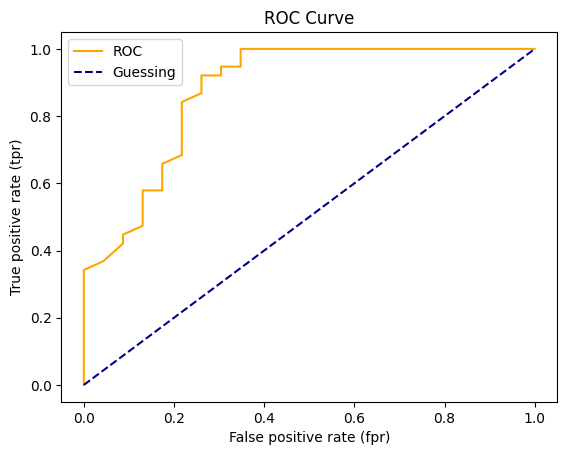

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):

  plt.plot(fpr,tpr,color = 'orange', label='ROC')
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')

  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test, y_probs_positive)

0.8775743707093822

<Axes: >

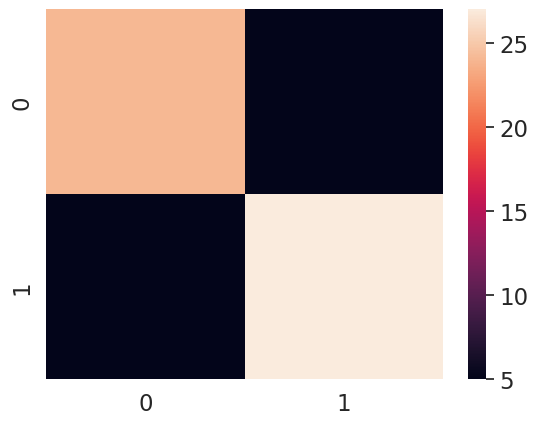

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

In [ ]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [ ]:
pip install --upgrade scikit-learn

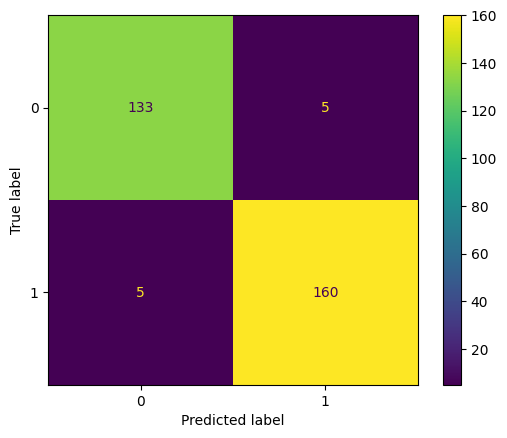

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean())

In [ ]:
r2_score(y_test, y_test_mean)

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
cv_acc = cross_val_score(clf,X,y, cv=5 , scoring = 'f1')
cv_acc.mean()

0.8302696308666458